Original dataset shape: (1288, 1850)

--- Performance & Analysis ---


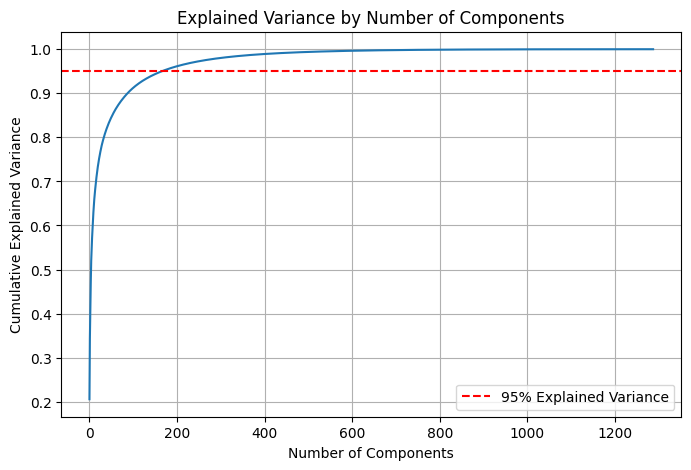

Number of components to explain 95% of variance: 167

Visualizing original vs. reconstructed images...


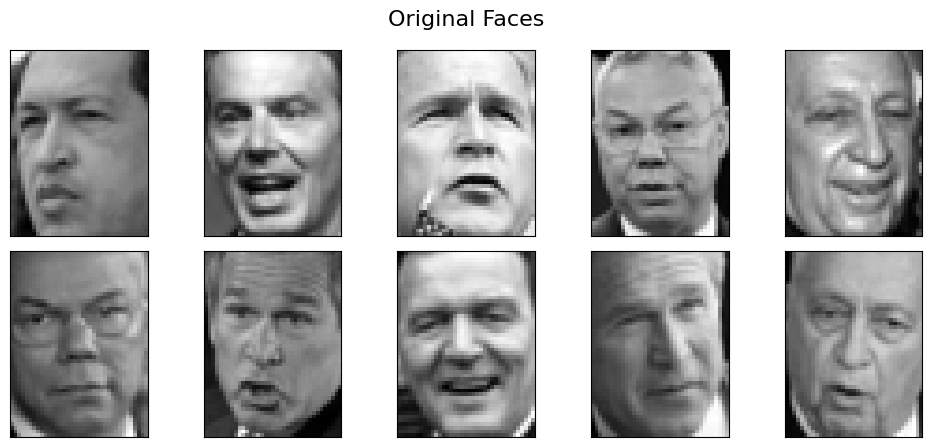

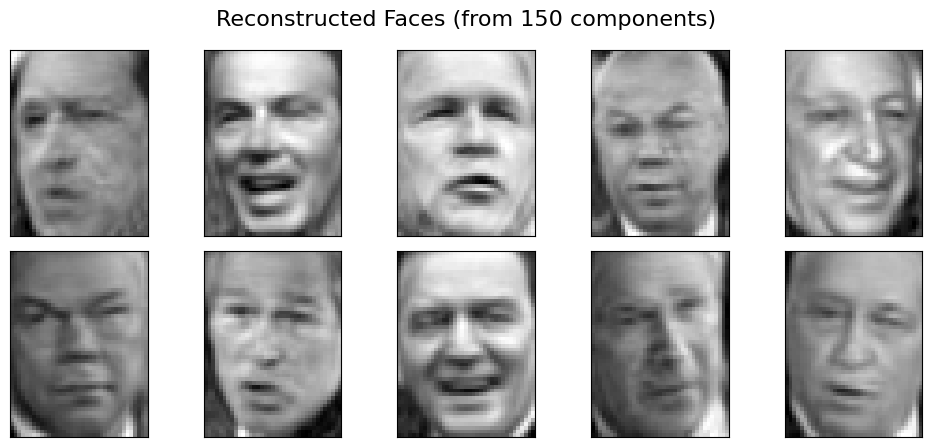

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

# 1. Load Data
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data
y = lfw_people.target
n_samples, h, w = lfw_people.images.shape
print(f"Original dataset shape: {X.shape}")


# 2. Instantiate & Fit PCA to find explained variance
# We fit PCA on the full number of features to see how variance is distributed
pca = PCA().fit(X)


# 3. Output - Performance Metrics & Visualizations
print("\n--- Performance & Analysis ---")

# Graphical Output 1: Cumulative Explained Variance Plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.legend(loc='best')
plt.show()

# Find the number of components to retain 95% of variance
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit(X)
print(f"Number of components to explain 95% of variance: {pca_95.n_components_}")


# Graphical Output 2: Original vs. Reconstructed Images
print("\nVisualizing original vs. reconstructed images...")
n_components_to_show = 150
pca = PCA(n_components=n_components_to_show).fit(X)
X_transformed = pca.transform(X)
X_reconstructed = pca.inverse_transform(X_transformed)

def plot_gallery(title, images, n_col=5, n_row=2):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(range(n_row * n_col)):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[comp].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
    plt.tight_layout()
    plt.show()

plot_gallery("Original Faces", X[:10])
plot_gallery(f"Reconstructed Faces (from {n_components_to_show} components)", X_reconstructed[:10])